In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

In [7]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
midwest_df = pd.read_csv("midwest_data.csv")
southeast_df = pd.read_csv("southeast_data.csv")

# Display sample data
midwest_df.head()

,State,Year,Population,Median Age,Median Year Moved In,Median Home Value,Total Housing with Mortgage,Total Housing without Mortgage,Median Monthly Costs with Mortgage,Median Monthly Costs without Mortgage,Household Income,Per Capita Income,Median Household Income with Mortgage,Median Household Income without Mortgage,Poverty Count,Poverty Rate
0,Ohio,2018,11641879.0,39.3,2002.0,140000.0,1944435.0,1126792.0,1269.0,471.0,54533.0,30304.0,82178.0,49920.0,1645986.0,14.138491
1,Indiana,2018,6637426.0,37.6,2003.0,135400.0,1158794.0,601938.0,1130.0,401.0,54325.0,28461.0,77244.0,49471.0,908359.0,13.685411
2,Illinois,2018,12821497.0,37.9,2003.0,187200.0,2034106.0,1154929.0,1668.0,626.0,63575.0,34463.0,93876.0,57899.0,1635603.0,12.756724
3,Michigan,2018,9957488.0,39.7,2003.0,146200.0,1681021.0,1096093.0,1279.0,484.0,54938.0,30336.0,80982.0,48491.0,1457008.0,14.632285
4,Wisconsin,2018,5778394.0,39.3,2003.0,173600.0,1008935.0,559105.0,1418.0,550.0,59209.0,32018.0,85828.0,53875.0,668220.0,11.564113


In [19]:
# Merge two DataFrames
census_pd = pd.concat([midwest_df, southeast_df])
census_pd

,State,Year,Population,Median Age,Median Year Moved In,Median Home Value,Total Housing with Mortgage,Total Housing without Mortgage,Median Monthly Costs with Mortgage,Median Monthly Costs without Mortgage,Household Income,Per Capita Income,Median Household Income with Mortgage,Median Household Income without Mortgage,Poverty Count,Poverty Rate
0,Ohio,2018,11641879.0,39.3,2002.0,140000.0,1944435.0,1126792.0,1269.0,471.0,54533.0,30304.0,82178.0,49920.0,1645986.0,14.138491
1,Indiana,2018,6637426.0,37.6,2003.0,135400.0,1158794.0,601938.0,1130.0,401.0,54325.0,28461.0,77244.0,49471.0,908359.0,13.685411
2,Illinois,2018,12821497.0,37.9,2003.0,187200.0,2034106.0,1154929.0,1668.0,626.0,63575.0,34463.0,93876.0,57899.0,1635603.0,12.756724
3,Michigan,2018,9957488.0,39.7,2003.0,146200.0,1681021.0,1096093.0,1279.0,484.0,54938.0,30336.0,80982.0,48491.0,1457008.0,14.632285
4,Wisconsin,2018,5778394.0,39.3,2003.0,173600.0,1008935.0,559105.0,1418.0,550.0,59209.0,32018.0,85828.0,53875.0,668220.0,11.564113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,North Carolina,2022,10470214.0,39.1,2008.0,234900.0,1690466.0,1027495.0,1496.0,457.0,66186.0,37641.0,98222.0,57723.0,1357418.0,12.964568
56,South Carolina,2022,5142750.0,40.0,2009.0,216200.0,830217.0,604445.0,1423.0,421.0,63623.0,36072.0,92428.0,55236.0,717849.0,13.958466
57,Tennessee,2022,6923772.0,38.9,2008.0,232100.0,1064620.0,755105.0,1449.0,442.0,64035.0,36040.0,94174.0,58262.0,943583.0,13.628164
58,Virginia,2022,8624511.0,38.7,2008.0,339800.0,1489688.0,709611.0,2014.0,546.0,87249.0,47210.0,124028.0,72155.0,836686.0,9.701257


In [20]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
census_pd.to_csv("nationwide_data.csv", encoding="utf-8", index=False)

In [25]:
data_years = [
    2018,
    2019,
    2020,
    2021,
    2022
]

In [26]:
# Add the columns to get the total number of owned homes
census_pd["Total Owned Homes"] = census_pd["Total Housing with Mortgage"] + census_pd["Total Housing without Mortgage"]

# Calculate the home ownership rate
census_pd["Home Ownership Rate"] = 100 * census_pd["Total Owned Homes"].astype(int) / census_pd["Population"].astype(int)

# Group by year and calculate the mean home ownership rate for each year, and rename it
yearly_ownership_rate = census_pd.groupby("Year")["Home Ownership Rate"].mean()
yearly_ownership_rate.head()

Year
2018    26.017425
2019    26.119480
2020    26.452871
2021    26.451317
2022    26.781484
Name: Home Ownership Rate, dtype: float64

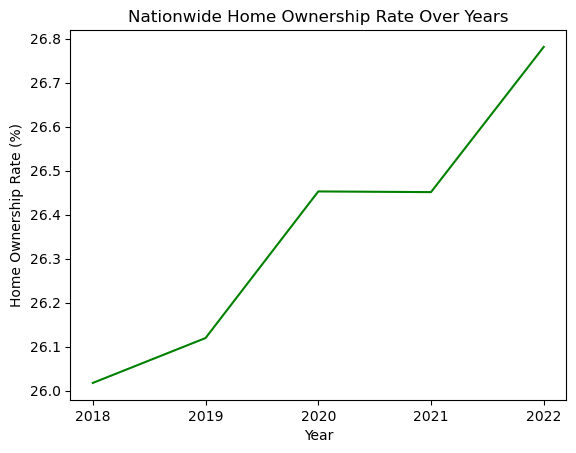

In [27]:
# Plot the home ownership rate over the years
plt.plot(yearly_ownership_rate.index, yearly_ownership_rate.values, linestyle='-', color='g')
plt.title('Nationwide Home Ownership Rate Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Home Ownership Rate (%)')
plt.show()

In [28]:
labels = []
medians = []
for data_year in data_years:
    labels.append(str(data_year))
    medians.append(census_pd.loc[census_pd["Year"] == data_year]["Household Income"].median())

medians

[54429.0, 56452.5, 58175.5, 61941.0, 67545.0]

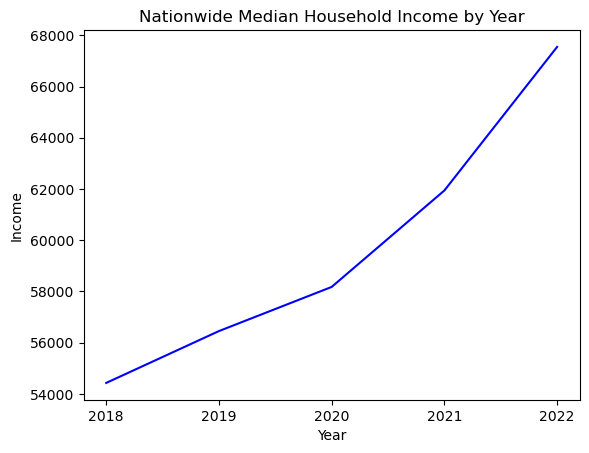

In [30]:
plt.plot(labels, medians, "b-")

# Incorporate the other graph properties
plt.title('Nationwide Median Household Income by Year')
plt.xlabel('Year')
plt.ylabel('Income')

# Show plot
plt.show()

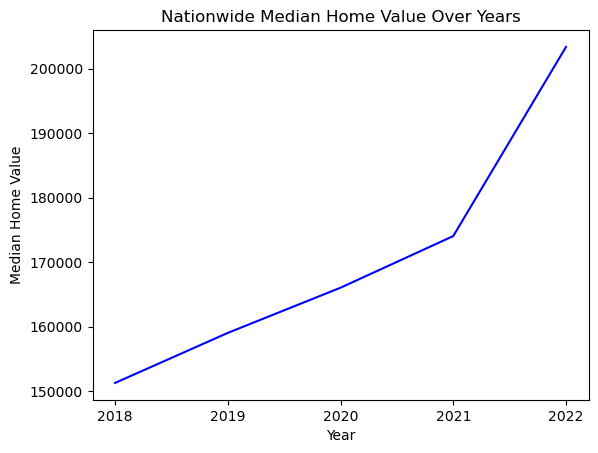

In [31]:
# Filter the data to get median home values over the years
years = census_pd["Year"].unique()
median_home_values = []

for year in years:
    median_value = census_pd.loc[census_pd["Year"] == year]["Median Home Value"].median()
    median_home_values.append(median_value)

# Create the plot
# plt.figure(figsize=(10, 6))
plt.plot(years, median_home_values, linestyle='-', color='b')
plt.title('Nationwide Median Home Value Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Median Home Value')

# Show the plot
plt.show()

In [32]:
census_pd[["Median Home Value", "Median Monthly Costs with Mortgage"]].describe()

,Median Home Value,Median Monthly Costs with Mortgage
count,120.000000,120.000000
mean,178005.833333,1379.000000
std,43284.453505,203.562639
min,114500.000000,1023.000000
25%,147800.000000,1238.500000
50%,167650.000000,1343.500000
75%,198700.000000,1481.500000
max,339800.000000,2014.000000


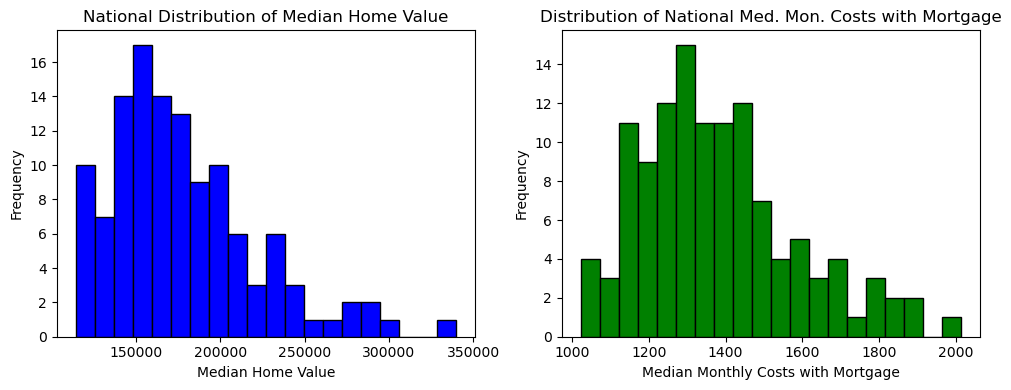

In [33]:
plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(census_pd["Median Home Value"], bins=20, color='blue', edgecolor='black')
plt.title('National Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs with Mortgage
plt.subplot(1, 2, 2)
plt.hist(census_pd["Median Monthly Costs with Mortgage"], bins=20, color='green', edgecolor='black')
plt.title('Distribution of National Med. Mon. Costs with Mortgage')
plt.xlabel('Median Monthly Costs with Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

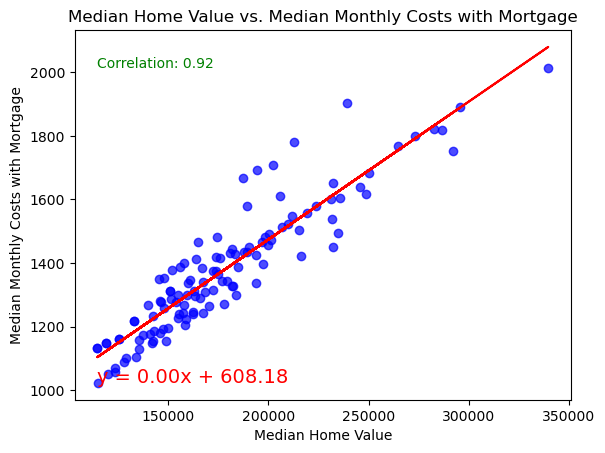

In [34]:
# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_with_mortgage = census_pd["Median Monthly Costs with Mortgage"]

# Calculate Pearson correlation, Perform linear regression calculate regression line.
correlation = st.pearsonr(home_values, costs_with_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_with_mortgage)
regression_line = slope * home_values + intercept

# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_with_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Add regression equation 
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(home_values.min(), costs_with_mortgage.min(), equation_text, fontsize=14, color="red")

# Create the scatter plot
plt.scatter(home_values, costs_with_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs with Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs with Mortgage')

# Show the plot
plt.show()

In [35]:
census_pd[["Median Home Value", "Median Monthly Costs without Mortgage"]].describe()

,Median Home Value,Median Monthly Costs without Mortgage
count,120.000000,120.000000
mean,178005.833333,461.366667
std,43284.453505,89.159185
min,114500.000000,319.000000
25%,147800.000000,380.500000
50%,167650.000000,468.000000
75%,198700.000000,520.250000
max,339800.000000,737.000000


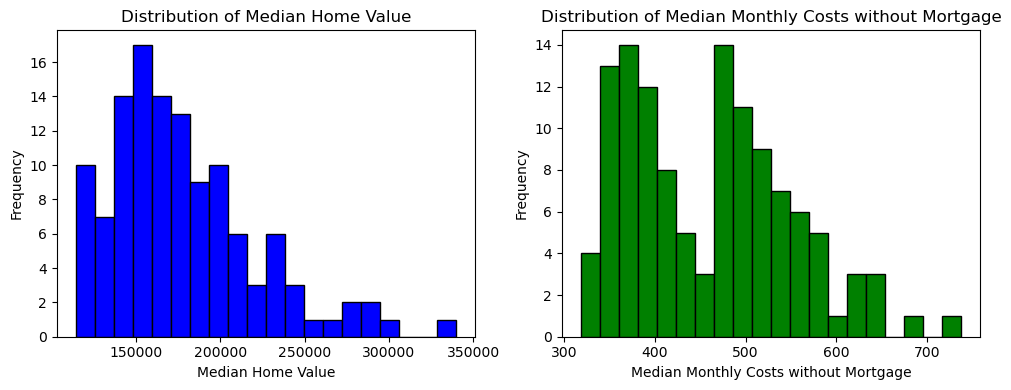

In [36]:
costs_without_mortgage = census_pd["Median Monthly Costs without Mortgage"]

plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(home_values, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs without Mortgage
plt.subplot(1, 2, 2)
plt.hist(costs_without_mortgage, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Median Monthly Costs without Mortgage')
plt.xlabel('Median Monthly Costs without Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [37]:
def regressValues(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

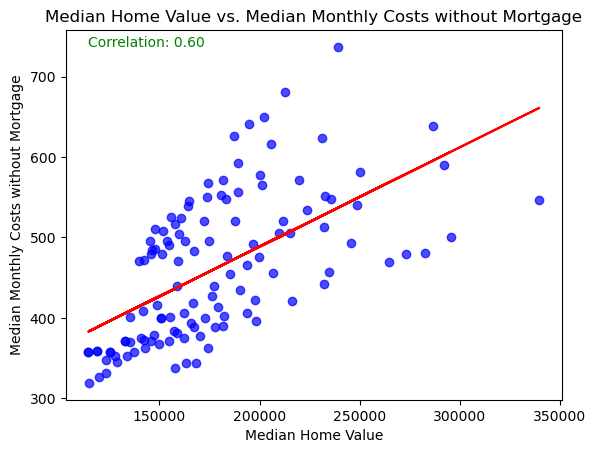

In [38]:
# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_without_mortgage = census_pd["Median Monthly Costs without Mortgage"]

correlation = st.pearsonr(home_values, costs_without_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_without_mortgage)
regression_line = slope * home_values + intercept

# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_without_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Create the scatter plot
plt.scatter(home_values, costs_without_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs without Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs without Mortgage')

# Show the plot
plt.show()

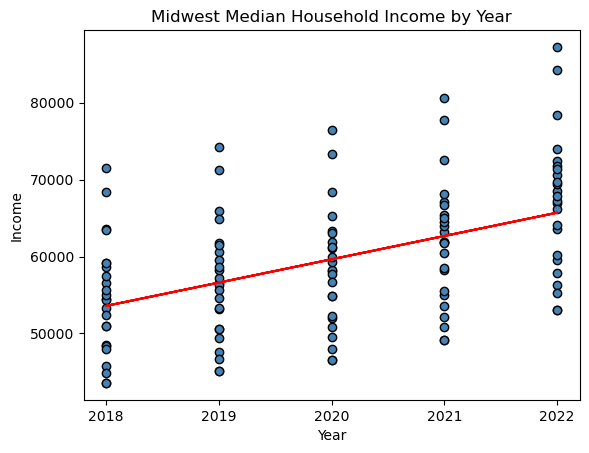

In [39]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Household Income"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Household Income"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Median Household Income by Year')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Income')

# Show plot
plt.show()

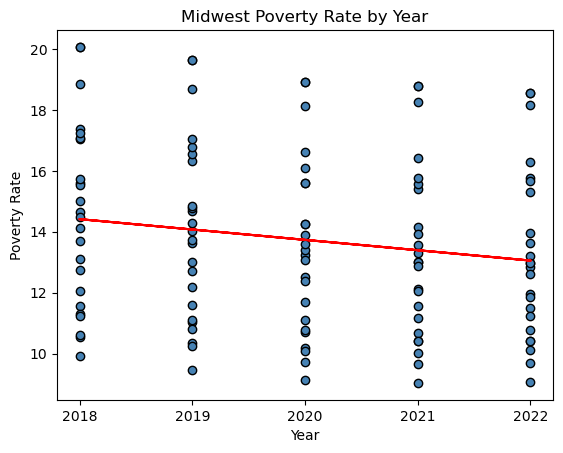

In [40]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Poverty Rate by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()

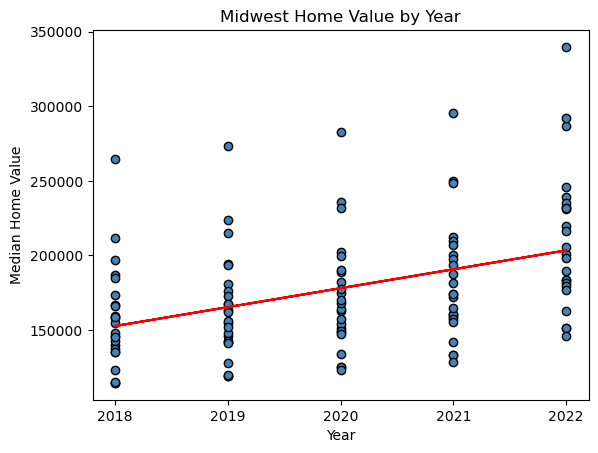

In [41]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Median Home Value"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Median Home Value"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Home Value by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Median Home Value')

# Show plot
plt.show()

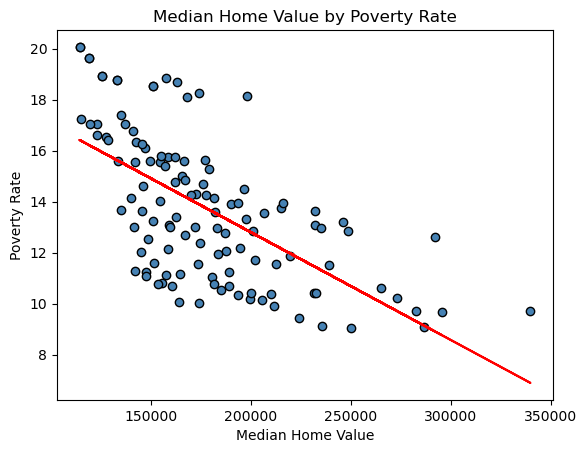

In [42]:
plt.plot(census_pd["Median Home Value"], regressValues(census_pd["Median Home Value"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Median Home Value"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Median Home Value by Poverty Rate')
plt.xlabel('Median Home Value')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()